### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [159]:
data = pd.read_csv('/Users/dsgarcha/Downloads/assignment_5_1_starter/data/coupons.csv')

In [160]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [162]:
missing_values = data.isnull().sum().sort_values() # check for any missing values
missing_values

#missing_values.plot(kind = 'bar')

#data['credit_history'].value_counts() # check different types of values in non-numeric columns
#sns.histplot(df, x='class')


destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [163]:
# data[{'Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse'}]

In [164]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [165]:
#sample1 = data.loc[data.Y == 1]
#sample2 = data.loc[data.Y == 0]
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [166]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [167]:
# Drop off columns 'car' due to lack of data and 'direction_opp' due to irrelevant
data2 = data.drop(['car', 'direction_opp'], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [168]:
# Replace missing values (nan) in Bar, RestaurantLessThan20, CarryAway, Restaurant20To50, CoffeeHouse with '1~3'
#data2.replace('', '1~3')
#data2.Bar = data2.Bar.fillna('1~3')
data2[['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse']] = data2[['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse']].fillna('1~3')
#data['Bar'].unique()

In [169]:
data2.isnull().sum().sort_values() 

destination             0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
income                  0
occupation              0
education               0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passanger               0
direction_same          0
Y                       0
dtype: int64

In [170]:
data2['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [171]:
total_yes = data['Y'].value_counts()[1]
print (total_yes)

7210


In [172]:
data2['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Count by Coupon Types')

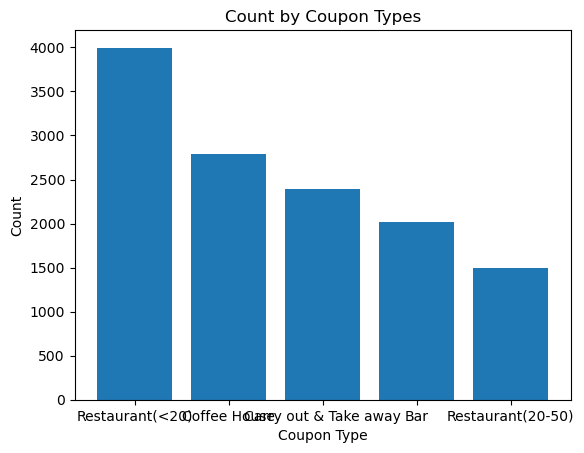

In [173]:
plt.bar(data2['coupon'].unique(),data2['coupon'].value_counts())
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Count by Coupon Types')
#plt.figure(figsize=(100,20))
#plt.figure().set_figwidth(100)

6. Use a histogram to visualize the temperature column.

(array([2316.,    0.,    0.,    0.,    0., 3840.,    0.,    0.,    0.,
        6528.]),
 array([30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 <BarContainer object of 10 artists>)

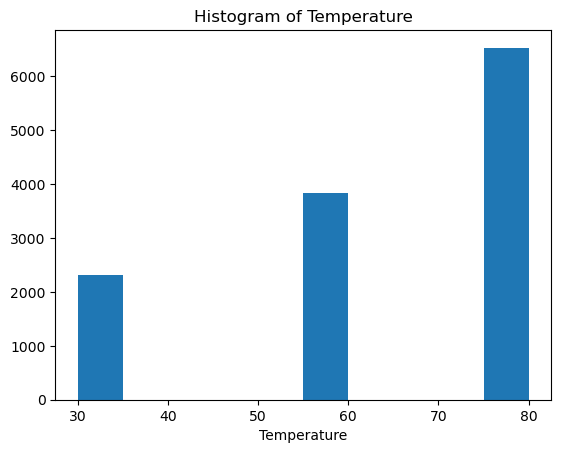

In [174]:
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.hist(data2['temperature'])
#plt.savefig('images/hist2.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [175]:

data_bar = data2[['Bar', 'income', 'occupation', 'maritalStatus', 'age', 'passanger', 'RestaurantLessThan20', 'Y']]
data_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bar                   12684 non-null  object
 1   income                12684 non-null  object
 2   occupation            12684 non-null  object
 3   maritalStatus         12684 non-null  object
 4   age                   12684 non-null  object
 5   passanger             12684 non-null  object
 6   RestaurantLessThan20  12684 non-null  object
 7   Y                     12684 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 792.9+ KB


2. What proportion of bar coupons were accepted?


In [176]:
data_bar['Bar'].value_counts()


never    5197
less1    3482
1~3      2580
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [177]:
bar_coupons_accept = data_bar['Y'].value_counts()[1] / len(data_bar.index)
bar_coupons_accept

0.5684326710816777

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [178]:
data_bar_yes = data_bar.loc[data_bar.Y == 1]
data_bar_no = data_bar.loc[data_bar.Y == 0]

In [179]:
lt3_bar = data_bar['Bar'].value_counts()['never'] + data_bar['Bar'].value_counts()['less1'] + data_bar['Bar'].value_counts()['1~3']
lt3_bar_yes = data_bar_yes['Bar'].value_counts()['never'] + data_bar_yes['Bar'].value_counts()['less1'] + data_bar_yes['Bar'].value_counts()['1~3']
lt3_bar_accept = lt3_bar_yes / lt3_bar
lt3_bar_accept

0.5615951683097966

In [180]:
gt3_bar = data_bar['Bar'].value_counts()['4~8'] + data_bar['Bar'].value_counts()['gt8']
gt3_bar_yes = data_bar_yes['Bar'].value_counts()['4~8'] + data_bar_yes['Bar'].value_counts()['gt8']
gt3_bar_accept = gt3_bar_yes / gt3_bar
gt3_bar_accept

0.6224561403508772

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [181]:
#data_bar_gt25 = data_bar.loc[data_bar.age.isin(['46', '26', '31', '41', '50plus', '36'])]
data_bar_gt25 = data_bar.loc[data_bar['age'].isin(['46', '26', '31', '41', '50plus', '36'])]
data_bar_gt25_yes = data_bar_gt25.loc[data_bar_gt25.Y == 1]
data_bar_gt25_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5276 entries, 44 to 12680
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bar                   5276 non-null   object
 1   income                5276 non-null   object
 2   occupation            5276 non-null   object
 3   maritalStatus         5276 non-null   object
 4   age                   5276 non-null   object
 5   passanger             5276 non-null   object
 6   RestaurantLessThan20  5276 non-null   object
 7   Y                     5276 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 371.0+ KB


In [182]:
gt1_bar25 = data_bar_gt25['Bar'].value_counts()['1~3'] + data_bar_gt25['Bar'].value_counts()['4~8'] + data_bar_gt25['Bar'].value_counts()['gt8']
gt1_bar25_yes = data_bar_gt25_yes['Bar'].value_counts()['1~3'] + data_bar_gt25_yes['Bar'].value_counts()['4~8'] + data_bar_gt25_yes['Bar'].value_counts()['gt8']
gt1_bar25_accept = gt1_bar25_yes / gt1_bar25
gt1_bar25_accept

0.6174426685198054

In [183]:
bar_others = len(data_bar.index) - gt1_bar25
bar_others_yes = len(data_bar_yes.index) - gt1_bar25_yes
bar_others_accept = bar_others_yes / bar_others
bar_others_accept

0.5540485417091576

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [184]:
# dataset of driver who go to bars more than oce a month
data_bar_gt1 = data_bar.loc[data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
data_bar_gt1_yes = data_bar_gt1.loc[data_bar_gt1.Y == 1]
data_bar_gt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 88 to 12545
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bar                   4005 non-null   object
 1   income                4005 non-null   object
 2   occupation            4005 non-null   object
 3   maritalStatus         4005 non-null   object
 4   age                   4005 non-null   object
 5   passanger             4005 non-null   object
 6   RestaurantLessThan20  4005 non-null   object
 7   Y                     4005 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 281.6+ KB


In [185]:
data['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [186]:
data_bar_gt1_pass_occ = data_bar_gt1.loc[data_bar_gt1['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])].loc[data_bar_gt1['occupation'] != 'Farming Fishing & Forestry']
data_bar_gt1_pass_occ_yes = data_bar_gt1_pass_occ.loc[data_bar_gt1_pass_occ.Y == 1]

In [187]:
gt1_pass_occ_accept = len(data_bar_gt1_pass_occ_yes.index) / len(data_bar_gt1_pass_occ.index)
gt1_pass_occ_accept

0.619550858652576

In [188]:
gt1_pass_occ_others = len(data_bar.index) - len(data_bar_gt1_pass_occ.index)
gt1_pass_occ_others_yes = len(data_bar_yes.index) - len(data_bar_gt1_pass_occ_yes.index)
gt1_pass_occ_others_accept = gt1_pass_occ_others_yes / gt1_pass_occ_others
gt1_pass_occ_others_accept

0.5466906393976851

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [189]:
data_bar_gt1_pass_nw = data_bar_gt1.loc[data_bar_gt1['passanger'].isin(['Alone', 'Friend(s)', 'Partner'])].loc[data_bar_gt1['maritalStatus'] != 'Widowed']
data_bar_gt1_pass_nw_yes = data_bar_gt1_pass_nw.loc[data_bar_gt1_pass_nw.Y == 1]
gt1_pass_nw_accept = len(data_bar_gt1_pass_nw_yes.index) / len(data_bar_gt1_pass_nw.index)
gt1_pass_nw_accept                                                                                                   

0.619550858652576

In [190]:
data_bar_gt1_u30 = data_bar_gt1.loc[data_bar_gt1['age'].isin(['21', '26', 'below21'])]
data_bar_gt1_u30_yes = data_bar_gt1_u30.loc[data_bar_gt1_u30.Y == 1]
gt1_pass_u30_accept = len(data_bar_gt1_u30_yes.index) / len(data_bar_gt1_u30.index)
gt1_pass_u30_accept

0.6283842794759825

In [191]:
data_bar_cheap_rest = data_bar.loc[data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])].loc[data_bar['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]
data_bar_cheap_rest_yes = data_bar_cheap_rest.loc[data_bar_cheap_rest.Y == 1]
data_bar_cheap_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279 entries, 0 to 12545
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bar                   2279 non-null   object
 1   income                2279 non-null   object
 2   occupation            2279 non-null   object
 3   maritalStatus         2279 non-null   object
 4   age                   2279 non-null   object
 5   passanger             2279 non-null   object
 6   RestaurantLessThan20  2279 non-null   object
 7   Y                     2279 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 160.2+ KB


In [192]:
gt1_pass_cheap_rest_accept = len(data_bar_cheap_rest_yes.index) / len(data_bar_cheap_rest.index)
gt1_pass_cheap_rest_accept

0.6007020623080298

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  